In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [261]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [200]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [8]:
data.shape

(7920, 3)

In [10]:
data.duplicated().sum()

0

In [13]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [158]:
import re
import string

In [262]:
data['tweet'].head()

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [263]:
# convert uppercase to lower case
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [265]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [266]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [267]:
#Remove punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [268]:
#Remove punctuations
#string.punctuation

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [270]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [271]:
# remove numbers
data['tweet'] = data['tweet'].str.replace('\d+','',regex=True)

In [272]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [59]:
#remove stop words
!pip install nltk
import nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.2 MB/s  0:00:00

   ---------------------------------------- 0/3 [regex]
   ---------------------------------------- 0/3 [regex]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [273]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [274]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [275]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [276]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [277]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [170]:
#stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [278]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [279]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [280]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vocabulary

In [281]:
from collections import Counter
vocab = Counter()

In [282]:
vocab

Counter()

In [283]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [284]:
len(vocab)

15949

In [285]:
tokens = [key for key in vocab if vocab[key] > 10] 

In [286]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [241]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()
    
save_vocabulary(tokens,'../static/model/vocabulary.txt')

### Divide dataset

In [242]:
X = data['tweet']
y = data['label']

In [83]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 9.6 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 10.1 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 10.4 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 9.8 MB/s  0:00:00
   ---------------------------------------- 0.0/38.7 MB ? eta -:--:--
   -- ------------------------------------- 2.9/38.7 MB 13.9 MB/s eta 0:00:03
   ----- ---------------------------------- 5.2/38.7 MB 12.7 MB/s eta 0:00:03
   ------- -------------------------------- 7.6/38.7 MB 12.0 MB/s eta 0:00:03
   --------- ------------------------------ 9.4/38.7 MB 11.5 MB/s eta 0:00:03
   ----------- ---------------------------- 11.3/38.7 MB 11.0 MB/s eta 0:00:03
   -------------- ------------------------- 13.6/38.7 MB 10.8 MB/s eta 0:00:03
   --------

In [287]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [288]:
X_train

6035    cathedral basilica st louis photodaily instapi...
2426    gain followers rt must follow follow back foll...
7828    happy kiggy cats pets smile apple shotoniphone...
3913    present new treasure lolz samsung tv led new h...
5512    share passion ones love thanksgiving apple cin...
                              ...                        
2220    new babe galaxy nexus babe new phone samsung i...
1763    iphoneplus love battery beoooooty never runs q...
1350    im bad muzzle selfie selfpic mirror iphone cur...
2911    matrix pc pcgamer pcsetup alienware razer dell...
2556    finally upgraded years bye bye blackberry hell...
Name: tweet, Length: 6336, dtype: object

In [289]:
y_train

6035    0
2426    0
7828    0
3913    0
5512    0
       ..
2220    0
1763    0
1350    0
2911    0
2556    0
Name: label, Length: 6336, dtype: int64

### Vectorization

In [290]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [291]:
vectorized_x_train = vectorizer(X_train, tokens)

In [292]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [293]:
vectorized_x_test= vectorizer(X_test, tokens)

In [294]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

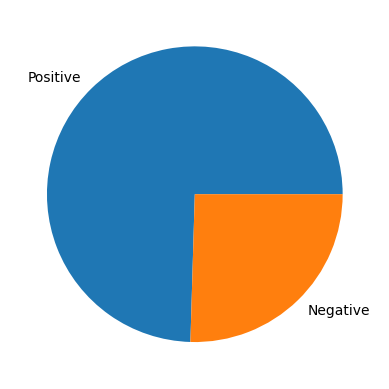

In [295]:
y_train.value_counts() # imballenced
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels = ['Positive','Negative'])
plt.show()

### Handling Im Balanced data

In [98]:
!pip install imbalanced-learn


   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]


In [296]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9444, 1145) (9444,)


In [297]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

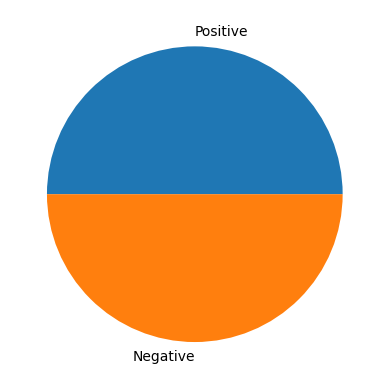

In [298]:
y_train_smote.value_counts()
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels = ['Positive','Negative'])
plt.show()

## Model Training and Evaluation

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [313]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    print(f'Training scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    print(f'Testing scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-score = {f1}')

### Logistic Regression

In [308]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training score:
	Accuracy = 0.901
	Precision = 0.87
	Recall = 0.944
	F1-score = 0.905
Testing score:
	Accuracy = 0.836
	Precision = 0.643
	Recall = 0.83
	F1-score = 0.725


## Naive Bayes

In [309]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training score:
	Accuracy = 0.865
	Precision = 0.847
	Recall = 0.892
	F1-score = 0.869
Testing score:
	Accuracy = 0.838
	Precision = 0.643
	Recall = 0.852
	F1-score = 0.733


## Decision Tree

In [310]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training score:
	Accuracy = 0.991
	Precision = 0.988
	Recall = 0.994
	F1-score = 0.991
Testing score:
	Accuracy = 0.783
	Precision = 0.597
	Recall = 0.507
	F1-score = 0.549


## Random Forest

In [311]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training score:
	Accuracy = 0.991
	Precision = 0.986
	Recall = 0.996
	F1-score = 0.991
Testing score:
	Accuracy = 0.834
	Precision = 0.702
	Recall = 0.629
	F1-score = 0.663


## Support Vector Machine

In [312]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training score:
	Accuracy = 0.957
	Precision = 0.931
	Recall = 0.988
	F1-score = 0.959
Testing score:
	Accuracy = 0.842
	Precision = 0.673
	Recall = 0.76
	F1-score = 0.714


## Xgboost Algorithm

In [315]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 8.3 MB/s eta 0:00:09
   - -------------------------------------- 2.4/72.0 MB 7.9 MB/s eta 0:00:09
   -- ------------------------------------- 5.0/72.0 MB 9.4 MB/s eta 0:00:08
   ---- ----------------------------------- 7.6/72.0 MB 10.4 MB/s eta 0:00:07
   ----- ---------------------------------- 10.2/72.0 MB 10.8 MB/s eta 0:00:06
   ------- -------------------------------- 12.8/72.0 MB 11.2 MB/s eta 0:00:06
   -------- ------------------------------- 15.5/72.0 MB 11.4 MB/s eta 0:00:05
   --------- ------------------------------ 17.6/72.0 MB 11.7 MB/s eta 0:00:05
   ----------- ---------------------------- 20.2/72.0 MB 11.4 MB/s eta 0:00:05
   ------------ --------------------------- 22.5/72.0 MB 11.5 MB/s eta 0:00:05
   ------------- -------------------------- 24.4/72.0 MB 11.3 MB/s eta 0:00:05
   -------------- ------------------------- 26.7/72.0 MB 11.1 MB/s e

In [320]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# 1. Define the model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Define the parameter grid
# Adjust these ranges based on your computational resources
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# 3. Set up the Grid Search with 5-fold Cross-Validation
# We use 'f1' or 'roc_auc' as scoring since you used SMOTE
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1', 
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 4. Fit the grid search to the SMOTE training data
grid_search.fit(vectorized_x_train_smote, y_train_smote)

# 5. Extract the best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")
xgb_best_model = grid_search.best_estimator_


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [321]:
y_train_pred_tuned = xgb_best_model.predict(vectorized_x_train_smote)

y_test_pred_tuned = xgb_best_model.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred_tuned)

validation_scores(y_test, y_test_pred_tuned)

Training scores:
	Accuracy = 0.918
	Precision = 0.893
	Recall = 0.95
	F1-score = 0.92
Testing scores:
	Accuracy = 0.85
	Precision = 0.682
	Recall = 0.796
	F1-score = 0.735


In [322]:
## To save the model
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)